https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [5]:
new_columns = []

for col in exchange_rates.columns:
    col = col.replace('[', '')
    col = col.replace(']', '')
    col = col.replace("\\", '')
    col = col.replace('PeriodUnit', 'Time')
    col = col.strip()
    col = col.replace(' ', '_')
    col = col.replace(':', '')
    col = col.lower()
    new_columns.append(col)
    
exchange_rates.columns = new_columns
print(exchange_rates.columns)

Index(['time', 'australian_dollar', 'bulgarian_lev', 'brazilian_real',
       'canadian_dollar', 'swiss_franc', 'chinese_yuan_renminbi',
       'cypriot_pound', 'czech_koruna', 'danish_krone', 'estonian_kroon',
       'uk_pound_sterling', 'greek_drachma', 'hong_kong_dollar',
       'croatian_kuna', 'hungarian_forint', 'indonesian_rupiah',
       'israeli_shekel', 'indian_rupee', 'iceland_krona', 'japanese_yen',
       'korean_won', 'lithuanian_litas', 'latvian_lats', 'maltese_lira',
       'mexican_peso', 'malaysian_ringgit', 'norwegian_krone',
       'new_zealand_dollar', 'philippine_peso', 'polish_zloty', 'romanian_leu',
       'russian_rouble', 'swedish_krona', 'singapore_dollar',
       'slovenian_tolar', 'slovak_koruna', 'thai_baht', 'turkish_lira',
       'us_dollar', 'south_african_rand'],
      dtype='object')


In [7]:
exchange_rates['time'] = pd.to_datetime(exchange_rates['time'])

In [8]:
exchange_rates.sort_values('time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

Cleaning explanation and next step

In [9]:
euro_to_dollar = exchange_rates[['time', 'us_dollar']]

In [10]:
euro_to_dollar['us_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1193     6
          ..
1.0928     1
1.2043     1
1.0983     1
1.3642     1
1.2898     1
Name: us_dollar, Length: 3528, dtype: int64

In [17]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['us_dollar'] != '-']
euro_to_dollar['us_dollar'] = euro_to_dollar['us_dollar'].astype(float)

In [20]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       5637 non-null   datetime64[ns]
 1   us_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


Now analyse euro to dollar in graphs

In [25]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['us_dollar'].rolling(30).mean()
euro_to_dollar.head(35)

,time,us_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
5,1999-01-11,1.1569,NaN
6,1999-01-12,1.1520,NaN
7,1999-01-13,1.1744,NaN
8,1999-01-14,1.1653,NaN
9,1999-01-15,1.1626,NaN


We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

Exploratory data analysis

In [32]:
euro_to_dollar_2018 = euro_to_dollar[euro_to_dollar['time'].dt.year >= 2018]
euro_to_dollar_2018.head()

,time,us_dollar,rolling_mean
4927,2018-01-02,1.2065,1.184123
4928,2018-01-03,1.2023,1.184883
4929,2018-01-04,1.2065,1.185830
4930,2018-01-05,1.2045,1.186920
4931,2018-01-08,1.1973,1.187667


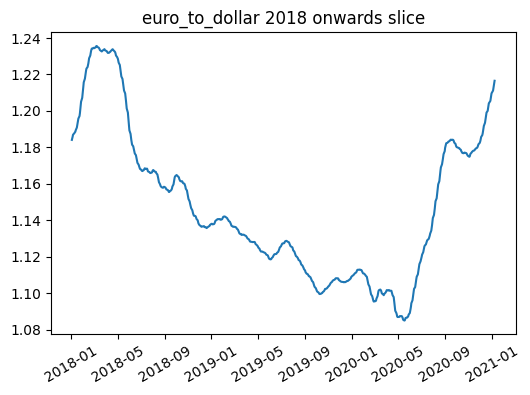

In [35]:
plt.plot(euro_to_dollar_2018['time'], euro_to_dollar_2018['rolling_mean'])
plt.xticks(rotation=30)
plt.title('euro_to_dollar 2018 onwards slice')
plt.show()

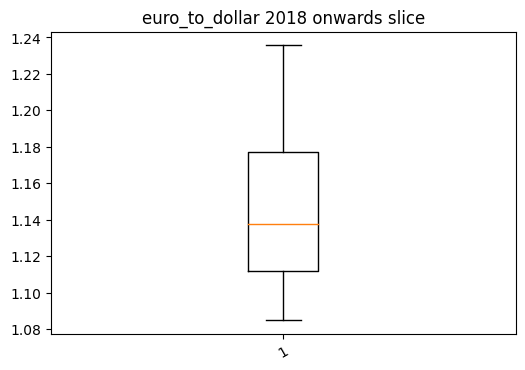

In [38]:
plt.boxplot(euro_to_dollar_2018['rolling_mean'])
plt.xticks(rotation=30)
plt.title('euro_to_dollar 2018 onwards slice')
plt.show()

Dollar Inflation

In [188]:
highlight = euro_to_dollar_2018[euro_to_dollar_2018['time'].dt.year >= 2020]

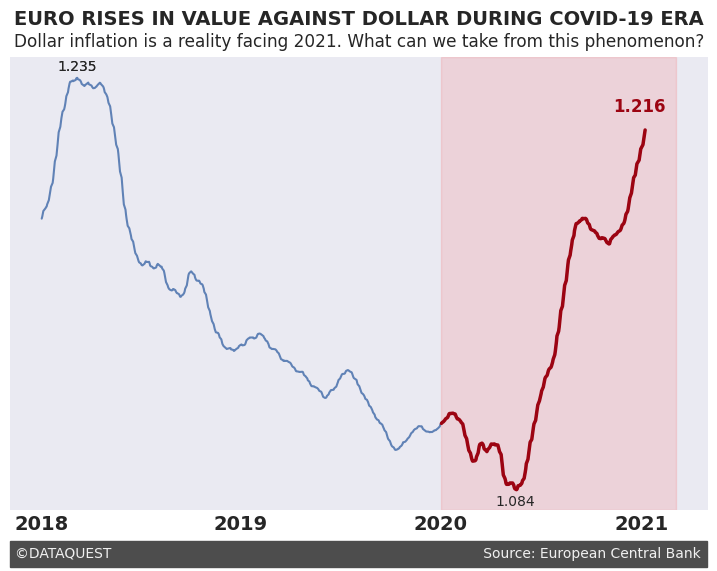

In [230]:
style.use('seaborn-dark')

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(euro_to_dollar_2018['time'], euro_to_dollar_2018['rolling_mean'], color='#6082B6')
ax.plot(highlight['time'], highlight['rolling_mean'], linewidth=2.5, color='#9C0412')
ax.set_yticks([])
ax.set_xticklabels([2018, '', '', 2019, '', '', 2020, '', '', 2021], weight='bold', size=14)
ax.text(737524, 1.079, '1.084')
ax.text(736725, 1.238, '1.235')
ax.text(736725, 1.238, '1.235')
ax.text(737740, 1.223, '1.216', size=12, weight='bold', color='#9C0412')
ax.text(736645, 1.255, 'EURO RISES IN VALUE AGAINST DOLLAR DURING COVID-19 ERA', size=14, weight='bold')
ax.text(736645, 1.247, 'Dollar inflation is a reality facing 2021. What can we take from this phenomenon?', size=12.2)
ax.axvspan(xmin=737425, xmax=737854, alpha=0.1, color='red')
ax.text(736648, 1.06, '©DATAQUEST' + ' '*85 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)
plt.show()

In [50]:
euro_to_dollar_2018['rolling_mean'].describe()

count    772.000000
mean       1.147341
std        0.040777
min        1.084997
25%        1.111701
50%        1.137807
75%        1.177085
max        1.235627
Name: rolling_mean, dtype: float64

In [165]:
help(ax.axvspan)

Help on method axvspan in module matplotlib.axes._axes:

axvspan(xmin, xmax, ymin=0, ymax=1, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Add a vertical span (rectangle) across the axes.
    
    Draw a vertical span (rectangle) from *xmin* to *xmax*.  With
    the default values of *ymin* = 0 and *ymax* = 1. This always
    spans the yrange, regardless of the ylim settings, even if you
    change them, e.g., with the :meth:`set_ylim` command.  That is,
    the vertical extent is in axes coords: 0=bottom, 0.5=middle,
    1.0=top but the x location is in data coordinates.
    
    Parameters
    ----------
    xmin : scalar
        Number indicating the first X-axis coordinate of the vertical
        span rectangle in data units.
    xmax : scalar
        Number indicating the second X-axis coordinate of the vertical
        span rectangle in data units.
    ymin : scalar, optional
        Number indicating the first Y-axis coordinate of the vertical
        sp

In [79]:
ax.get_xticks()

array([736695., 736815., 736938., 737060., 737180., 737303., 737425.,
       737546., 737669., 737791.])

In [74]:
ax.get_yticks()

array([1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26])

In [110]:
euro_to_dollar_2018.tail()

,time,us_dollar,rolling_mean
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357
5698,2021-01-08,1.2250,1.216557


In [194]:
highlight['time'].describe()

count                     262
unique                    262
top       2020-03-13 00:00:00
freq                        1
first     2020-01-02 00:00:00
last      2021-01-08 00:00:00
Name: time, dtype: object